## Аналитика мобильных приложений в AppStore

Ссылка на задачу https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps

Этот набор для статистики мобильных приложения в AppStore, состоит из:
1. track_name: Имя приложения
2. size_bytes: Размер (в байтах)
3. currency: Тип валюты
4. price: Стоимость
5. rating_count_tot: Рейтинг пользователей (для всех версий)
6. rating_count_ver: Рейтинг пользователей (для текущей версии)
7. user_rating: Среднее значение пользовательского рейтинга (для всех версий)
8. user_rating_ver: Среднее значение пользовательского рейтинга (для текущей версии)
9. ver: Последний код версии
10. cont_rating: Рейтинг контента
11. prime_genre: Основной жанр
12. sup_devices.num: Количество поддерживающих устройств
13. ipadSc_urls.num: Количество скриншотов для отображения
14. lang.num: Количество поддерживаемых языков
15. vpp_lic: Включено лицензирование на основе устройств Vpp


In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Загрузка данных. Вывод размерности

In [2]:
data = pd.read_csv('AppleStore.csv', header=0)
print(data.shape)
data.head()

(7197, 17)


,rank,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


Построение графика по рангу и цене (как видно большый ранг у бесплатных приложений)

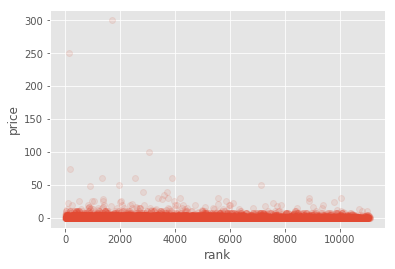

In [3]:
plt.plot(data['rank'], data['price'], 'o', alpha=0.1)
plt.xlabel('rank')
plt.ylabel('price')
pass

Вывод 

In [4]:
print(data['currency'].unique())
print(data['vpp_lic'].unique())

['USD']
[1 0]


Удаление значений id, track_name, size_bytes, ver, currency из таблицы, т.к эти поля не нужны

In [5]:
data.drop(['id', 'track_name', 'size_bytes', 'ver', 'currency'], axis=1, inplace=True)
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['cont_rating', 'prime_genre']
['rank', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


Подготовим данные для обучения

In [6]:
data[numerical_columns].count()

rank                7197
price               7197
rating_count_tot    7197
rating_count_ver    7197
user_rating         7197
user_rating_ver     7197
sup_devices.num     7197
ipadSc_urls.num     7197
lang.num            7197
vpp_lic             7197
dtype: int64

Проверим есть ли в категориальных данных бинарные. Бинарных данных нет.

In [7]:
data_describe = data.describe(include=[object])
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['cont_rating', 'prime_genre']


Разделим данные на два типа обучающую и тренировучную выборки

In [8]:
print(data['cont_rating'].unique())
print(data['prime_genre'].unique())

['4+' '12+' '17+' '9+']
['Games' 'Productivity' 'Weather' 'Shopping' 'Reference' 'Finance' 'Music'
 'Utilities' 'Travel' 'Social Networking' 'Sports' 'Business'
 'Health & Fitness' 'Entertainment' 'Photo & Video' 'Navigation'
 'Education' 'Lifestyle' 'Food & Drink' 'News' 'Book' 'Medical' 'Catalogs']


Векторизуем возрастное ограничение и жанр

In [9]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['cont_rating_12+', 'cont_rating_17+', 'cont_rating_4+',
       'cont_rating_9+', 'prime_genre_Book', 'prime_genre_Business',
       'prime_genre_Catalogs', 'prime_genre_Education',
       'prime_genre_Entertainment', 'prime_genre_Finance',
       'prime_genre_Food & Drink', 'prime_genre_Games',
       'prime_genre_Health & Fitness', 'prime_genre_Lifestyle',
       'prime_genre_Medical', 'prime_genre_Music', 'prime_genre_Navigation',
       'prime_genre_News', 'prime_genre_Photo & Video',
       'prime_genre_Productivity', 'prime_genre_Reference',
       'prime_genre_Shopping', 'prime_genre_Social Networking',
       'prime_genre_Sports', 'prime_genre_Travel', 'prime_genre_Utilities',
       'prime_genre_Weather'],
      dtype='object')


Числовые данные нормализуем

In [10]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean(axis=0)) / data_numerical.std(axis=0)

Полученные данные

In [11]:
data = pd.DataFrame(pd.concat((data_numerical, data_nonbinary), axis=1), dtype=int)
print(data.shape)
print(data.dtypes)

(7197, 37)
rank                             int64
price                            int64
rating_count_tot                 int64
rating_count_ver                 int64
user_rating                      int64
user_rating_ver                  int64
sup_devices.num                  int64
ipadSc_urls.num                  int64
lang.num                         int64
vpp_lic                          int64
cont_rating_12+                  int64
cont_rating_17+                  int64
cont_rating_4+                   int64
cont_rating_9+                   int64
prime_genre_Book                 int64
prime_genre_Business             int64
prime_genre_Catalogs             int64
prime_genre_Education            int64
prime_genre_Entertainment        int64
prime_genre_Finance              int64
prime_genre_Food & Drink         int64
prime_genre_Games                int64
prime_genre_Health & Fitness     int64
prime_genre_Lifestyle            int64
prime_genre_Medical              int64
prime_genre_Mu

Подготовим данные для обучения

In [12]:
X = data.drop(['rank'], axis=1)
y = data['rank']
feature_name = X.columns
N, d = X.shape
print(X.shape, y.shape)

(7197, 36) (7197,)


Разделим данные на два типа обучающую и тренировучную выборки

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)
N_train, _ = X_train.shape
N_test, _ = X_test.shape
print(N_train, N_test)

2159 5038


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [17]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)
print(err_train, err_test)

0.36266790180639186 0.4033346566097658


In [ ]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 25, 35, 45, 55, 65, 75, 85]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

Результат: 65 соседей является оптимальным параметром.

## Полносвязная нейронная сеть

Полносвязную нейронную сеть с одним скрытым слоем:

In [21]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(1,), solver='lbfgs', activation='logistic', random_state=42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [22]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.38165817508105604 0.39142516871774513


Полученные данные на тестовых данных стали хуже по сравнению с методом k ближайших соседей. Попробуем 2 скрытых слоя

In [23]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(2,), solver='lbfgs', activation='logistic', random_state=42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.37239462714219546 0.389043271139341


Видно небольшое улучшение на тестовых данных

In [25]:
alpha_arr = np.logspace(-10, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha=alpha, hidden_layer_sizes=(1,), solver='lbfgs', 
                              activation='logistic', random_state=42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

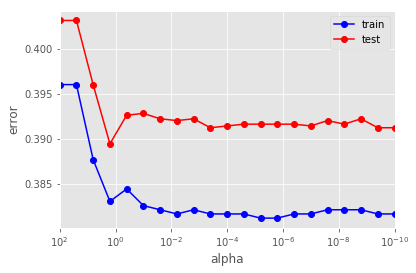

In [26]:
plt.semilogx(alpha_arr, train_err, 'b-o', label='train')
plt.semilogx(alpha_arr, test_err, 'r-o', label='test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Alpha - оптимальное значение

In [27]:
alpha_opt = alpha_arr[test_err == np.min(test_err)]
print(alpha_opt)

[1.58489319]


Вычисление значений при помощи найденного ранее Alpha

In [28]:
mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes=(1,), solver='lbfgs',
                          activation='logistic', random_state=42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.38304770727188514
0.389440254069075


## Random Forest

Используем классификатор "Случайный лес"

In [29]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test = np.mean(y_test != rf.predict(X_test))

print(err_train, err_test)

0.2765169059749884 0.4055180627233029


При количестве деревьев 10 видна ситуация переобучения. 
Рассмотрим несколько значений:

In [30]:
trees_arr = np.arange(1, 50, 5)
test_err = []
train_err = []
oob_err = []

for tree in trees_arr:
    rf = ensemble.RandomForestClassifier(n_estimators=tree, oob_score=True)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(1 - rf.oob_score_)

/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/ense

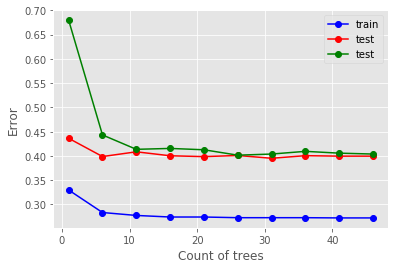

In [31]:
plt.plot(trees_arr, train_err, 'b-o', label='train')
plt.plot(trees_arr, test_err, 'r-o', label='test')
plt.plot(trees_arr, oob_err, 'g-o', label='test')
plt.xlabel('Count of trees')
plt.ylabel('Error')
plt.legend()
pass

На всем графике видна проблема с переобучением. Данный классификатор не подходит для нашей задачи.

## Extremely random forests

In [32]:
ert = ensemble.ExtraTreesClassifier(n_estimators=10)
ert.fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test = np.mean(y_test != ert.predict(X_test))

print(err_train, err_test)

0.27234830940250115 0.4055180627233029


Та же ситуация с переобучением. Эксперименты:

In [33]:
trees_arr = np.arange(1, 10, 1)
test_err = []
train_err = []
oob_err = []
for tree in trees_arr:
    ert = ensemble.ExtraTreesClassifier(n_estimators=tree, oob_score=True, bootstrap=True)
    ert.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ert.predict(X_train)))
    test_err.append(np.mean(y_test != ert.predict(X_test)))
    oob_err.append(1 - ert.oob_score_)

/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/ens

/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/ens

/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/ens

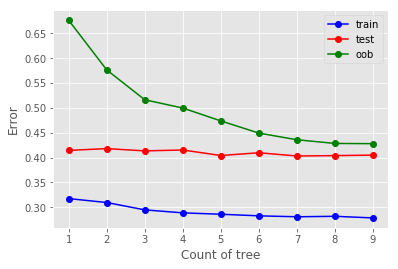

In [34]:
plt.plot(trees_arr, train_err, 'b-o', label='train')
plt.plot(trees_arr, test_err, 'r-o', label='test')
plt.plot(trees_arr, oob_err, 'g-o', label='oob')
plt.xlabel('Count of tree')
plt.ylabel('Error')
plt.legend()
pass

Опять переобучение. Алгоритм так же не подходит для наших данных.

## Adaboost

In [35]:
ab = ensemble.AdaBoostClassifier(n_estimators=5)
ab.fit(X_train, y_train)

err_train = np.mean(y_train != ab.predict(X_train))
err_test = np.mean(y_test != ab.predict(X_test))

print(err_train, err_test)

0.38026864289022694 0.3924176260420802


Переобучения не наблюдается. Но ошибка выходит за рамки разумного. Пробуем перебор:

In [36]:
estimator_arr = np.arange(1, 10, 1)
test_err = []
train_err = []
for estimator in estimator_arr:
    ab = ensemble.AdaBoostClassifier(n_estimators=estimator)
    ab.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ab.predict(X_train)))
    test_err.append(np.mean(y_test != ab.predict(X_test)))

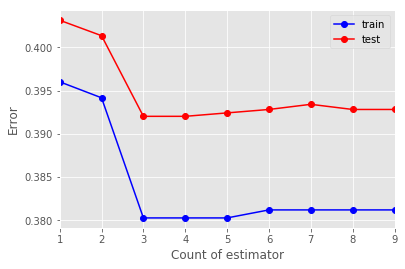

In [37]:
plt.plot(estimator_arr, train_err, 'b-o', label='train')
plt.plot(estimator_arr, test_err, 'r-o', label='test')
plt.xlim([np.min(estimator_arr), np.max(estimator_arr)])
plt.xlabel('Count of estimator')
plt.ylabel('Error')
plt.legend()
pass

In [38]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print(min_train_err, min_test_err)

0.38026864289022694 0.3920206431123462


При количестве деревьев = 1 получаются непдохие результаты. Но все же хуже, чем k ближайших соседей и полносвязной сети.

## Gradient boosted trees

In [39]:
gbt = ensemble.GradientBoostingClassifier(n_estimators=10)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.3756368689207967 0.39043271139341007


Опять наблюдается переобучение. Пробуем перебрать разные значения для количества деревьев:

In [40]:
tree_arr = np.arange(1, 50, 2)
test_err = []
train_err = []
for tree in tree_arr:
    gbt = ensemble.GradientBoostingClassifier(n_estimators=tree)
    gbt.fit(X_train, y_train)
    
    y_train_pred = gbt.predict(X_train)
    y_test_pred = gbt.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

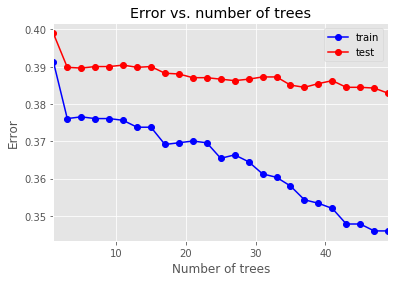

In [41]:
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Error')
plt.legend()
pass

Ни к чему хорошему этот алгоритм тоже не приводит.

## Principal Components Analysis

С помощью метода главных компонент пробуем уменьшить размерность исходных данных.

In [42]:
X.shape

(7197, 36)

Исходные данные имеют 68 столбцов. Уменьшим их в 2 раза - до 30:

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=18)
pca.fit(X_train)


pca_x_train = pca.transform(X_train)
pca_x_test = pca.transform(X_test)
print(pca_x_train.shape, pca_x_test.shape)

(5757, 18) (1440, 18)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Используем классификатор, который показал наилучший результат в экспериментах - Полносвязную нейронную сеть (alpha = 0.1). И пробуем различные значения для количества компонент.

In [45]:
alpha = 0.1
components_arr = np.arange(1, 36, 1)
test_err = []
train_err = []

for number in components_arr:
    pca = PCA(n_components=number)
    pca.fit(X_train)
    pca_x_train = pca.transform(X_train)
    pca_x_test = pca.transform(X_test)
    mlp_model = MLPClassifier(alpha=alpha, hidden_layer_sizes=(1,), solver='lbfgs', 
                              activation='logistic', random_state=42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))


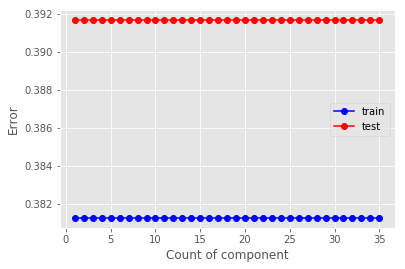

In [46]:
plt.plot(components_arr, train_err, 'b-o', label='train')
plt.plot(components_arr, test_err, 'r-o', label='test')
plt.xlabel('Count of component')
plt.ylabel('Error')
plt.legend()
pass

Из графика видно, что метод главных компонент никак не влияет на уменьшение ошибки.